<a href="https://colab.research.google.com/github/farism9q/T5-Bootcamp/blob/main/Week%20-%201/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/T5 - Bootcamp/data/نسخة من Titanic-Dataset.csv')
df.sample(200)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4000,NaN,C
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
221,222,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S
602,603,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.4000,NaN,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q


In [ ]:
# Check for null values (1 line)
print(df.isnull().sum())

df_embarked = df["Embarked"].isnull()

null_embarked = df[df_embarked]
print(null_embarked)


print(df.info())



# Fill null values for 'Embarked' with the mode(1 line)
embarked_mode = df["Embarked"].mode()[0]

df["Embarked"].fillna(embarked_mode)



# Drop rows with null values in 'Cabin' (or alternatively, you can fill it with a placeholder) (1 line)
print("Number of rows (Before dropping)")
print(len(df))
# 891

print("Number of rows (After dropping)")
no_null_cabin_df = df.dropna(subset=["Cabin"])

print(no_null_cabin_df)
# 204



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name  

In [ ]:
# Check for duplicates (1 line)
df.duplicated().sum()

# Drop duplicates if any (1 line)
# No duplications were found.

# If there are duplicates, this how to drop them:
# df.drop_duplicates(inplace=True)


0

Before removing outliers
After removing outliers


<Axes: ylabel='Fare'>

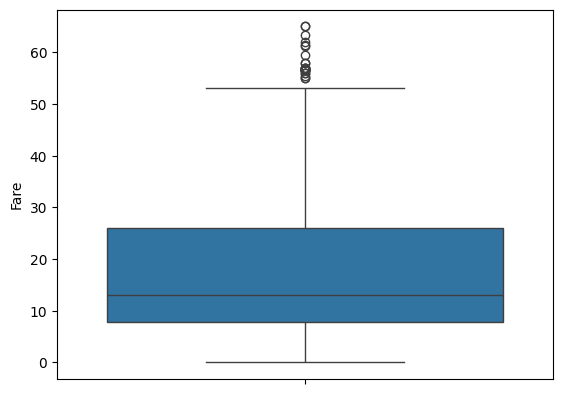

In [ ]:
import seaborn as sns

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Before removing outliers")
# sns.boxplot(df['Fare'])

# Remove outliers from 'Fare' using the remove_outilers function (1 line)
print("After removing outliers")
df_removed_outliers = remove_outliers(df, 'Fare')

# You will see points that seem as outliers, but they are not.
# Check before removing the outliers and you will understand
# NOTE: The points that are close to each other are NOT outlier.
  # This is because they are exactly next to the points that are inside the limit.
sns.boxplot(df_removed_outliers['Fare'])


